## Exploratory Analysis of Data Publication Links 

In [86]:
# load("../data/17072017_Mugging_Crossref_Datacite_links_out.Rda")
load("../data/datalinks_type.Rda")

In [87]:
library('ggplot2')
library('dplyr')
library("memoise")

In [88]:
get_data<- function(path){
    load(path)
    head(data)
}


In [115]:
data<-data_pack_w_type

In [117]:
get_summ_by_type<-function(data){
    data_type <- data %>% 
        group_by(type) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}
get_summ_by_type(data)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

type,total
text,14717
dataset,3566
,2482
software,565
collection,434
other,125
workflow,42
image,38
audiovisual,19
interactive-resource,6


### Coapring Links from last year to total of this year

In [140]:
get_summ_by_type_before<-function(data){
    data_type <- data %>%
        filter(occurred_at <= as.Date("2017-03-01")) %>%
        group_by(type) %>%  
            summarise(total = n())  %>%
        arrange(desc(total))
    return(data_type)
}


create_slope_data<-function(data){

    previous<-get_summ_by_type_before(data)
    colnames(previous)[2] <- "2017"
    
    last<-get_summ_by_type(data)
    colnames(last)[2] <- "2018"

    r <- previous %>% 
        rowwise() %>% 
        left_join(last)
    print(nrow(r))
    return(r) 
}




Warning message:
“Grouping rowwise data frame strips rowwise nature”Warning message:
“Grouping rowwise data frame strips rowwise nature”Joining, by = "type"


[1] 12


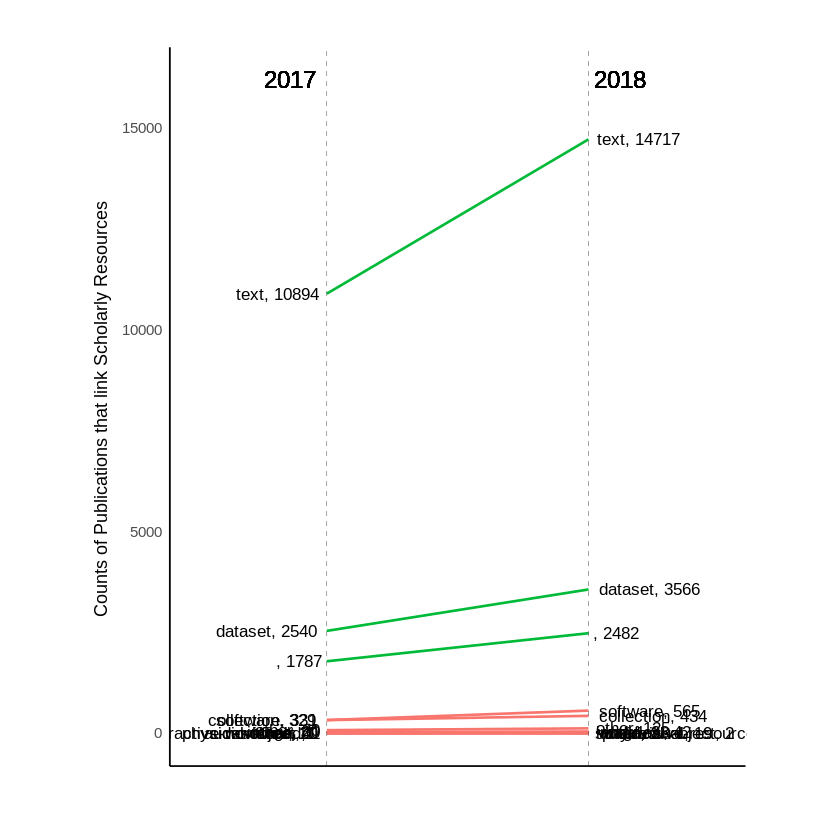

In [141]:
plot_slopegraph<-function(slope_df){
    # Plot
    left_label <- paste(slope_df$type, round(slope_df$`2017`),sep=", ")
    right_label <- paste(slope_df$type, round(slope_df$`2018`),sep=", ")
    slope_df$class <- ifelse((slope_df$`2018` - slope_df$`2017`) < 500, "red", "green")

    p <- ggplot(slope_df) + geom_segment(aes(x=1, xend=2, y=`2017`, yend=`2018`, col=class), size=.75, show.legend=F) + 
                      geom_vline(xintercept=1, linetype="dashed", size=.1) + 
                      geom_vline(xintercept=2, linetype="dashed", size=.1) +
                      scale_color_manual(labels = c("Up", "Down"), 
                                         values = c("green"="#00ba38", "red"="#f8766d")) +  # color of lines
                      labs(x="", y="Counts of Publications that link Scholarly Resources ") +  # Axis labels
                      xlim(.5, 2.5) + ylim(0,(1.1*(max(slope_df$`2017`, slope_df$`2018`))))  # X and Y axis limits

    # Add texts
    p <- p + geom_text(label=left_label, y=slope_df$`2017`, x=rep(1, NROW(slope_df)), hjust=1.1, size=3.5)
    p <- p + geom_text(label=right_label, y=slope_df$`2018`, x=rep(2, NROW(slope_df)), hjust=-0.1, size=3.5)
    p <- p + geom_text(label="2017", x=1, y=1.1*(max(slope_df$`2017`, slope_df$`2018`)), hjust=1.2, size=5)  # title
    p <- p + geom_text(label="2018", x=2, y=1.1*(max(slope_df$`2017`, slope_df$`2018`)), hjust=-0.1, size=5)  # title

    # Minify theme
    p + theme(panel.background = element_blank(), 
               panel.grid = element_blank(),
               axis.ticks = element_blank(),
               axis.text.x = element_blank(),
               panel.border = element_blank(),
               plot.margin = unit(c(1,2,1,2), "cm"))
}

plot_slopegraph(create_slope_data(data))

### Fields that cite data

In [96]:
data_relation <- data %>% 
    group_by(relation_type_id) %>%  
        summarise(total = n())  %>%
    arrange(desc(total))
data_relation

Warning message:
“Grouping rowwise data frame strips rowwise nature”

relation_type_id,total
references,3566


In [97]:
data<- data %>%  
    filter(type == "dataset")
nrow(data)
head(data)

[1] 3566

license,obj_id,source_token,occurred_at,subj_id,id,terms,message_action,source_id,timestamp,relation_type_id,obj_prefix,subj_prefix,unique(data$subj_prefix),subj_dc,unique(data$obj_prefix),obj_dc,doi,type
https://doi.org/10.13003/CED-terms-of-use,10.5061/dryad.dk385,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-02-13,https://doi.org/10.1111/pala.12283,d53dd280-221e-48f9-bbf8-d48aba12d818,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5061/,10.1111/,10.1111/,Wiley-Blackwell,10.5061/,Dryad,10.5061/dryad.dk385,dataset
https://doi.org/10.13003/CED-terms-of-use,10.5256/f1000research.10763.d151064,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-02-10,https://doi.org/10.12688/f1000research.10763.1,46f3df4f-74c0-42f2-a76d-b108f86d768b,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5256/,10.12688/,10.12688/,"F1000 Research, Ltd.",10.5256/,Faculty of 1000 Research Ltd,10.5256/f1000research.10763.d151064,dataset
https://doi.org/10.13003/CED-terms-of-use,10.5281/zenodo.193080,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2016-12-20,https://doi.org/10.12688/f1000research.10426.1,d871bfce-69ce-4437-be74-b8584ef3b0ec,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5281/,10.12688/,10.12688/,"F1000 Research, Ltd.",10.5281/,ZENODO - Research. Shared.,10.5281/zenodo.193080,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3886/ICPSR24461.v4,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-01-03,https://doi.org/10.1080/15504263.2016.1277816,a17203d5-0931-4232-88fd-9374f3c85579,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.3886/,10.1080/,10.1080/,Informa UK Limited,10.3886/,ICPSR,10.3886/ICPSR24461.v4,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3886/ICPSR04248.v3,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2016-01-18,https://doi.org/10.1080/13803395.2015.1125453,eeeebc62-9e43-41bd-8996-cb79414f7836,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.3886/,10.1080/,10.1080/,Informa UK Limited,10.3886/,ICPSR,10.3886/ICPSR04248.v3,dataset
https://doi.org/10.13003/CED-terms-of-use,10.5256/f1000research.10632.d150960,8676e950-8ac5-4074-8ac3-c0a18ada7e99,2017-02-08,https://doi.org/10.12688/f1000research.10632.1,f668add6-3a8a-4ae9-9595-e899086be25d,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-05-19,references,10.5256/,10.12688/,10.12688/,"F1000 Research, Ltd.",10.5256/,Faculty of 1000 Research Ltd,10.5256/f1000research.10632.d150960,dataset


In [98]:
get_distribution_events<- function(data){
    data_gr <- data %>% 
    group_by(occurred_at) %>%  
        summarise(total = n())
    head(data_gr)
    }
get_distribution_events(data)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

occurred_at,total
1998-02-01,1
1999-02-10,1
1999-03-01,2
1999-05-15,1
1999-08-01,2
1999-09-01,2


## Distribution of events overtime

In [99]:
data_gr <- data %>% 
    group_by(occurred_at) %>%  
        summarise(total = n())
head(data_gr)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

occurred_at,total
1998-02-01,1
1999-02-10,1
1999-03-01,2
1999-05-15,1
1999-08-01,2
1999-09-01,2


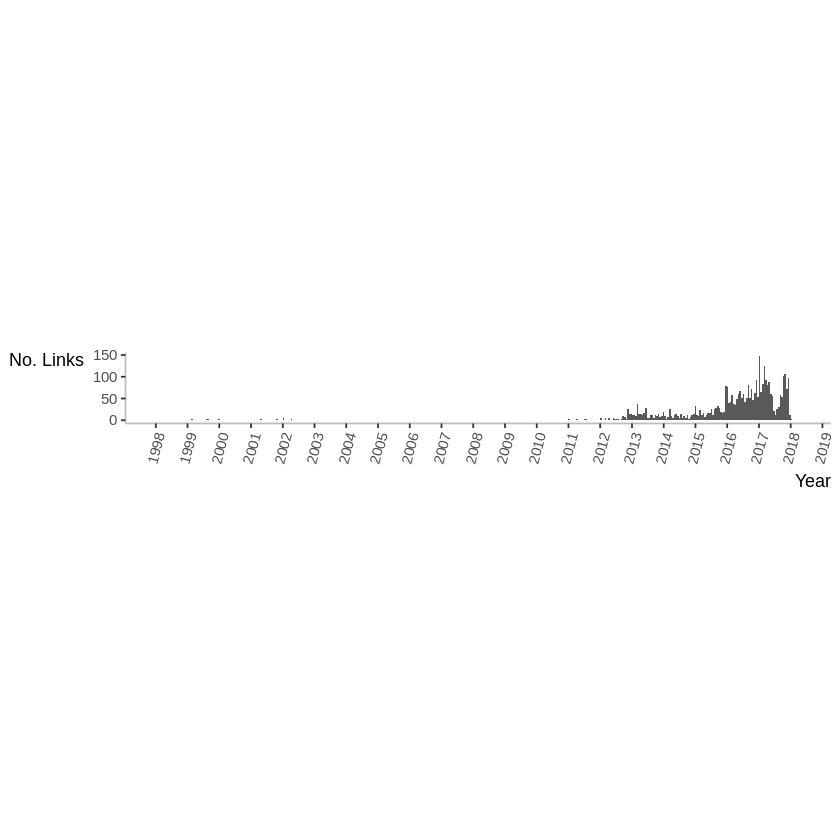

In [100]:
plot_datalinks<- function(data){
    b  <- ggplot(data=data, aes(x=occurred_at)) 
    n  <- b + geom_histogram(bins=400)
    n + theme(panel.background = element_rect(fill = "white"),
            axis.line = element_line(colour = "grey"),
            axis.title.x = element_text(hjust=1),
            axis.text.x = element_text(angle = 75, hjust = 1),
            axis.title.y = element_text(angle=0, vjust=1))  +
            scale_x_date(date_breaks = "1 year", date_labels =  "%Y") + coord_fixed(ratio=5) +
    xlab("Year") +
    ylab("No. Links")
    }
plot_datalinks(data)

## Verify old cases of referencing 

In [101]:
head(data[with(data, order(occurred_at)), ])

license,obj_id,source_token,occurred_at,subj_id,id,terms,message_action,source_id,timestamp,relation_type_id,obj_prefix,subj_prefix,unique(data$subj_prefix),subj_dc,unique(data$obj_prefix),obj_dc,doi,type
https://doi.org/10.13003/CED-terms-of-use,10.3334/CDIAC/otg.WOCE_OACES91_A16S,8676e950-8ac5-4074-8ac3-c0a18ada7e99,1998-02-01,https://doi.org/10.1016/S0304-4203(97)00084-4,9e325e65-d1ee-492d-8c8a-190caa27dab4,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-11-30,references,10.3334/,10.1016/,10.1016/,Elsevier BV,10.3334/,Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),10.3334/CDIAC/otg.WOCE_OACES91_A16S,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3334/CDIAC/cli.ndp025,8676e950-8ac5-4074-8ac3-c0a18ada7e99,1999-02-10,https://doi.org/10.1029/1998JB900057,f39a529a-a0b3-4016-92c9-7c6f27fd4cfc,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-11-30,references,10.3334/,10.1029/,10.1029/,American Geophysical Union (AGU),10.3334/,Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),10.3334/CDIAC/cli.ndp025,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3334/CDIAC/atg.010,8676e950-8ac5-4074-8ac3-c0a18ada7e99,1999-03-01,https://doi.org/10.1029/1998GB900022,8dda9b2c-fbb1-4f7d-bebb-fd89886f06ad,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-11-30,references,10.3334/,10.1029/,10.1029/,American Geophysical Union (AGU),10.3334/,Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),10.3334/CDIAC/atg.010,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3334/CDIAC/cli.db1004,8676e950-8ac5-4074-8ac3-c0a18ada7e99,1999-03-01,https://doi.org/10.1029/98JD02310,a9a1cc0e-273a-495a-af4c-5b76bfc889f8,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-11-30,references,10.3334/,10.1029/,10.1029/,American Geophysical Union (AGU),10.3334/,Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),10.3334/CDIAC/cli.db1004,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3334/CDIAC/ffe.db1013,8676e950-8ac5-4074-8ac3-c0a18ada7e99,1999-05-15,https://doi.org/10.1029/1999GL900250,61fd6a65-d796-4a6c-b28e-68ff5d42c243,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-11-30,references,10.3334/,10.1029/,10.1029/,American Geophysical Union (AGU),10.3334/,Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),10.3334/CDIAC/ffe.db1013,dataset
https://doi.org/10.13003/CED-terms-of-use,10.3886/ICPSR02301.v3,8676e950-8ac5-4074-8ac3-c0a18ada7e99,1999-08-01,https://doi.org/10.1016/S0160-791X(99)00018-4,c65741eb-64ac-4e8d-99e3-846bd59351d6,https://doi.org/10.13003/CED-terms-of-use,create,crossref,2017-11-30,references,10.3886/,10.1016/,10.1016/,Elsevier BV,10.3886/,ICPSR,10.3886/ICPSR02301.v3,dataset


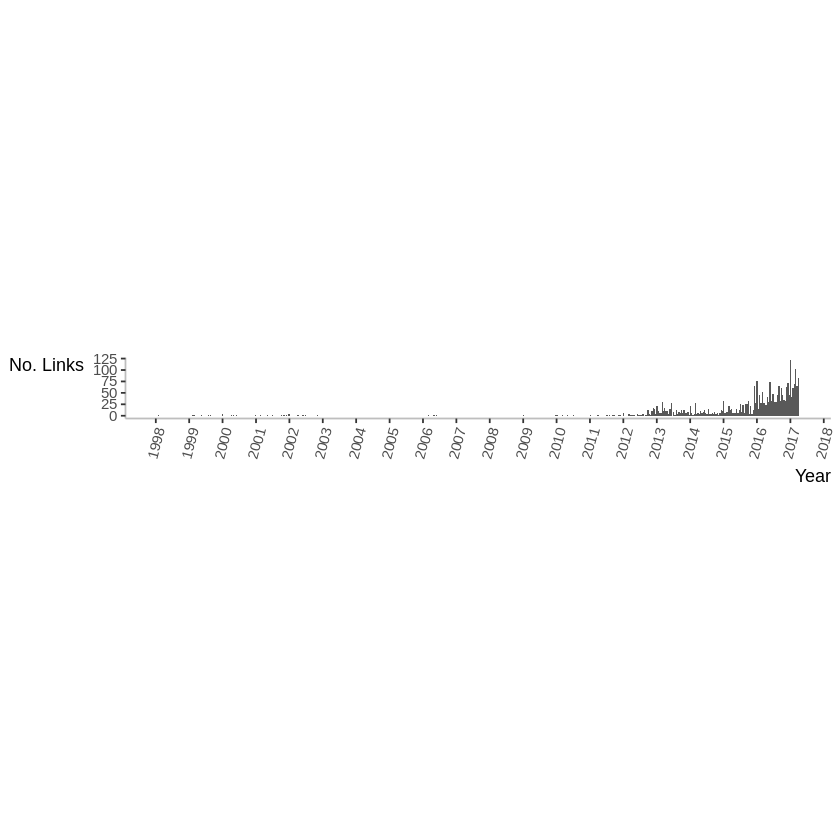

In [102]:
plot_datalinks_before<- function(data,date, date_breaks){
    data %>%
    filter(occurred_at <= as.Date(date)) %>%
    ggplot(aes(x=occurred_at)) + geom_histogram(bins=500) + theme(panel.background = element_rect(fill = "white"),
            axis.line = element_line(colour = "grey"),
            axis.title.x = element_text(hjust=1),
            axis.text.x = element_text(angle = 75, hjust = 1),
            axis.title.y = element_text(angle=0, vjust=1))  +
            scale_x_date(date_breaks = date_breaks, date_labels =  "%Y")  + coord_fixed(ratio=5) +
xlab("Year") +
ylab("No. Links")
    }
plot_datalinks_before(data,"2017-04-01","1 year" )

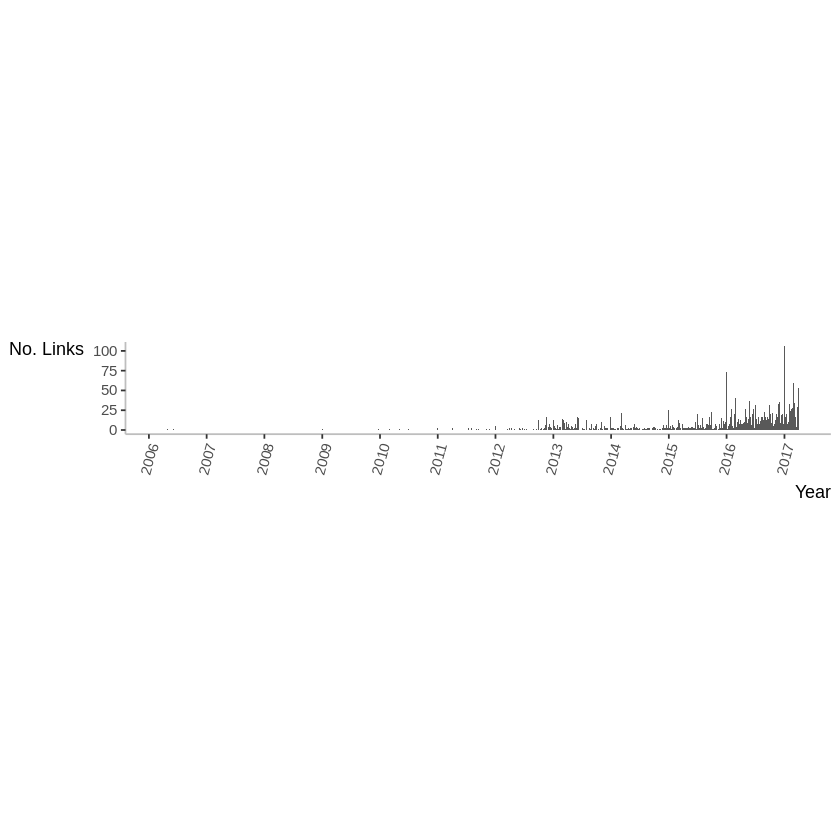

In [103]:
data %>%
    filter(occurred_at >= as.Date("2005-04-01") && occurred_at <= as.Date("2017-04-01") ) %>%
    ggplot(aes(x=occurred_at)) + geom_histogram(bins=800) + theme(panel.background = element_rect(fill = "white"),
            axis.line = element_line(colour = "grey"),
            axis.title.x = element_text(hjust=1),
            axis.text.x = element_text(angle = 75, hjust = 1),
            axis.title.y = element_text(angle=0, vjust=1))  +
            scale_x_date(date_breaks = "1 year", date_labels =  "%Y")  + coord_fixed(ratio=5) +
xlab("Year") +
ylab("No. Links")

In [104]:
tail(names(sort(table(data$occurred_at))), 3)
# data %>%
#     filter(occurred_at == as.Date("2016-01-01")  )

[1] "2015-12-10" "2016-01-01" "2017-01-01"

In [105]:
data_timestamp <- data %>% 
    group_by(timestamp) %>%  
        summarise(total = n()) 
data_timestamp

Warning message:
“Grouping rowwise data frame strips rowwise nature”

timestamp,total
2017-05-19,17
2017-05-31,691
2017-06-01,2079
2017-06-02,4
2017-06-03,3
2017-06-06,2
2017-06-07,5
2017-06-08,3
2017-06-09,4
2017-06-13,1


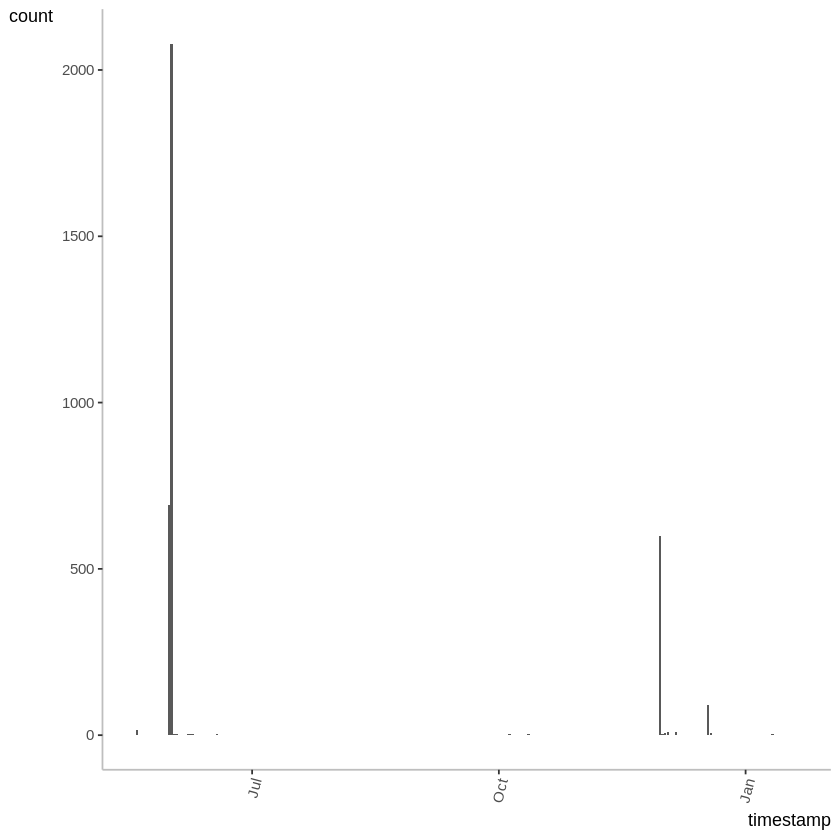

In [106]:
b  <- ggplot(data) 
n  <- b + geom_bar( aes(timestamp))
n + theme(panel.background = element_rect(fill = "white"),
        axis.line = element_line(colour = "grey"),
        axis.title.x = element_text(hjust=1),
        axis.text.x = element_text(angle = 75, hjust = 1),
        axis.title.y = element_text(angle=0, vjust=1)) 

## These are the DataCite prefixes with most relationships

In [109]:
data_obj <- data %>% 
    group_by(obj_dc) %>%  
        summarise(total = n())  %>%
    arrange(desc(total))
head(data_obj,25)
nrow(data_obj)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

obj_dc,total
Faculty of 1000 Research Ltd,450
Dryad,438
ICPSR,416
figshare Academic Research System,369
Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),217
World Data Center for Climate,192
GESIS Leibniz Institute for the Social Sciences,158
ZENODO - Research. Shared.,146
US National Oceanic and Atmospheric Administration (NOAA),96
UK Data Archive,76


[1] 116

In [108]:
data_obj <- data %>% 
    group_by(obj_prefix) %>%  
        summarise(total = n())  %>%
    arrange(desc(total))
head(data_obj)
nrow(data_obj)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

obj_prefix,total
10.5256/,450
10.5061/,438
10.3886/,416
10.6084/,369
10.3334/,217
10.1594/,192


[1] 121

## These are the Crossref prefixes with most relationships

In [110]:
data_subj <- data %>% 
    group_by(subj_dc) %>%  
        summarise(total = n())  %>%
    arrange(desc(total))
head(data_subj,40)
nrow(data_subj)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

subj_dc,total
Springer Nature,908
"F1000 Research, Ltd.",698
Wiley-Blackwell,563
Informa UK Limited,315
SAGE Publications,201
"eLife Sciences Organisation, Ltd.",127
American Chemical Society (ACS),104
MDPI AG,82
PeerJ,53
Pensoft Publishers,49


[1] 76

In [67]:
data_subj <- data %>% 
    group_by(subj_prefix) %>%  
        summarise(total = n())  %>%
    arrange(desc(total))
head(data_subj)
nrow(data_subj)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

subj_prefix,total
10.1007/,736
10.12688/,698
10.1002/,333
10.1080/,309
10.1111/,227
10.1177/,201


[1] 91

## These are the most frequent Crossref to DataCite relationships

In [111]:
data_comp_dc <- data %>% 
    group_by(obj_dc, subj_dc) %>%  
        summarise(total = n())  %>%
        arrange(desc(total))
head(data_comp_dc,10)
nrow(data_comp_dc)
data_comp_dc$obj_dc <- as.factor(data_comp_dc$obj_dc)
data_comp_dc$subj_dc <- as.factor(data_comp_dc$subj_dc)
dataxx = data_comp_dc %>% select(subj_dc, obj_dc, total)
head(dataxx,50)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

obj_dc,subj_dc,total
Faculty of 1000 Research Ltd,"F1000 Research, Ltd.",450
figshare Academic Research System,"F1000 Research, Ltd.",209
Dryad,Wiley-Blackwell,195
ICPSR,Informa UK Limited,139
ICPSR,SAGE Publications,130
Dryad,"eLife Sciences Organisation, Ltd.",107
Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),Wiley-Blackwell,86
Dryad,Springer Nature,75
World Data Center for Climate,Springer Nature,75
ICPSR,Springer Nature,71


[1] 450

subj_dc,obj_dc,total
"F1000 Research, Ltd.",Faculty of 1000 Research Ltd,450
"F1000 Research, Ltd.",figshare Academic Research System,209
Wiley-Blackwell,Dryad,195
Informa UK Limited,ICPSR,139
SAGE Publications,ICPSR,130
"eLife Sciences Organisation, Ltd.",Dryad,107
Wiley-Blackwell,Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC),86
Springer Nature,Dryad,75
Springer Nature,World Data Center for Climate,75
Springer Nature,ICPSR,71


In [69]:
unlist(lapply(data_comp_dc, function(x) any(is.na(x))))


obj_dc subj_dc   total 
  FALSE   FALSE   FALSE

In [70]:
data_comp_px <- data %>% 
    group_by(obj_prefix, subj_prefix) %>%  
        summarise(total = n())  %>%
        arrange(desc(total))
head(data_comp_px)
nrow(data_comp_px)

Warning message:
“Grouping rowwise data frame strips rowwise nature”

obj_prefix,subj_prefix,total
10.5256/,10.12688/,450
10.6084/,10.12688/,209
10.5061/,10.1111/,171
10.3886/,10.1080/,135
10.3886/,10.1177/,130
10.5061/,10.7554/,107


[1] 515

In [71]:
parallelset <- function(..., freq, col="gray", border=0, layer, 
                             alpha=0.5, gap.width=0.05) {
  p <- data.frame(..., freq, col, border, alpha, stringsAsFactors=FALSE)
  n <- nrow(p)
  if(missing(layer)) { layer <- 1:n }
  p$layer <- layer
  np <- ncol(p) - 5
  d <- p[ , 1:np, drop=FALSE]
  p <- p[ , -c(1:np), drop=FALSE]
  p$freq <- with(p, freq/sum(freq))
  col <- col2rgb(p$col, alpha=TRUE)
  if(!identical(alpha, FALSE)) { col["alpha", ] <- p$alpha*256 }
  p$col <- apply(col, 2, function(x) do.call(rgb, c(as.list(x), maxColorValue = 256)))
  getp <- function(i, d, f, w=gap.width) {
    a <- c(i, (1:ncol(d))[-i])
    o <- do.call(order, d[a])
    x <- c(0, cumsum(f[o])) * (1-w)
    x <- cbind(x[-length(x)], x[-1])
    gap <- cumsum( c(0L, diff(as.numeric(d[o,i])) != 0) )
    gap <- gap / max(gap) * w
    (x + gap)[order(o),]
  }
  dd <- lapply(seq_along(d), getp, d=d, f=p$freq)
  par(mar = c(0, 0, 2, 0) + 0.1, xpd=TRUE )
  plot(NULL, type="n",xlim=c(0, 1), ylim=c(np, 1),
       xaxt="n", yaxt="n", xaxs="i", yaxs="i", xlab='', ylab='', frame=FALSE)
  for(i in rev(order(p$layer)) ) {
     for(j in 1:(np-1) )
     polygon(c(dd[[j]][i,], rev(dd[[j+1]][i,])), c(j, j, j+1, j+1),
             col=p$col[i], border=p$border[i])
   }
   text(0, seq_along(dd), labels=names(d), adj=c(0,-2), font=2)
   for(j in seq_along(dd)) {
     ax <- lapply(split(dd[[j]], d[,j]), range)
     for(k in seq_along(ax)) {
       lines(ax[[k]], c(j, j))
#          text(ax[[k]][1], j, labels=names(ax)[k], adj=c(0, -0.25))
     }
   }           
}

In [72]:
library(RColorBrewer)
darkcols <- brewer.pal(8, "Spectral")
pal <-colorRampPalette(brewer.pal(8, "Paired"))
pal

function (n) 
{
    x <- ramp(seq.int(0, 1, length.out = n))
    if (ncol(x) == 4L) 
        rgb(x[, 1L], x[, 2L], x[, 3L], x[, 4L], maxColorValue = 255)
    else rgb(x[, 1L], x[, 2L], x[, 3L], maxColorValue = 255)
}
<bytecode: 0x46fa1c8>
<environment: 0x51d0610>

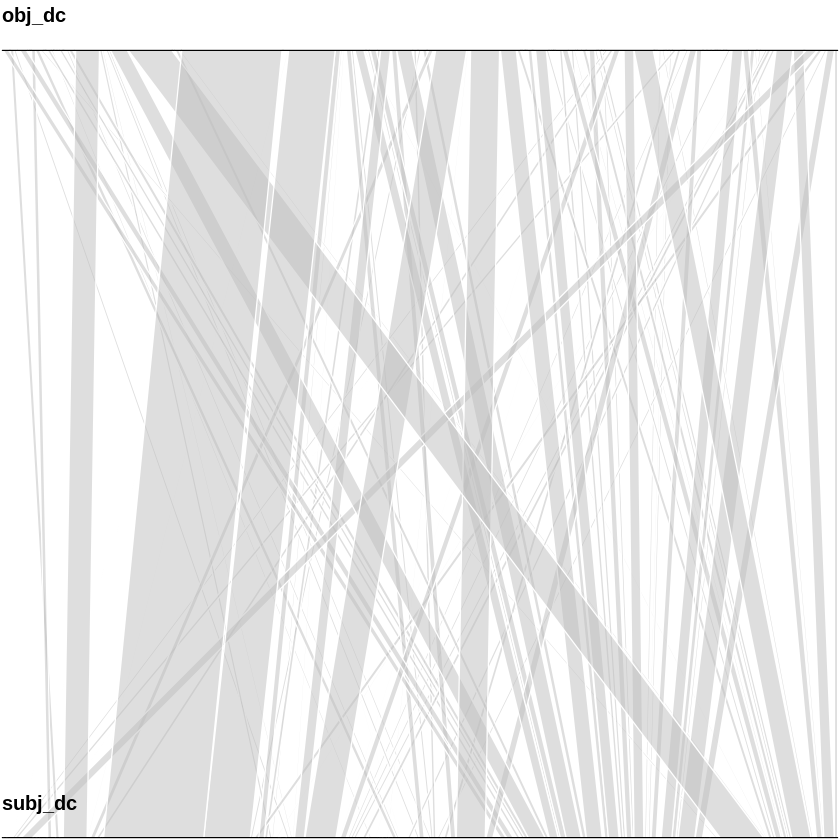

In [73]:
with(data_comp_dc, parallelset(obj_dc, subj_dc,  freq=total))

In [112]:
library(ggplot2)
library(scales)
theme_set(theme_classic())

# prep data
df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
colnames(df) <- c("continent", "1952", "1957")
left_label <- paste(df$continent, round(df$`1952`),sep=", ")
right_label <- paste(df$continent, round(df$`1957`),sep=", ")
df$class <- ifelse((df$`1957` - df$`1952`) < 0, "red", "green")

In [113]:
df

continent,1952,1957,class
Africa,1252.572,1385.236,green
Americas,4079.063,4616.044,green
Asia,5195.484,4003.133,red
Europe,5661.057,6963.013,green
Oceania,10298.086,11598.522,green


Warning message in diff(as.numeric(d[o, i])):
“NAs introduced by coercion”Warning message in diff(as.numeric(d[o, i])):
“NAs introduced by coercion”

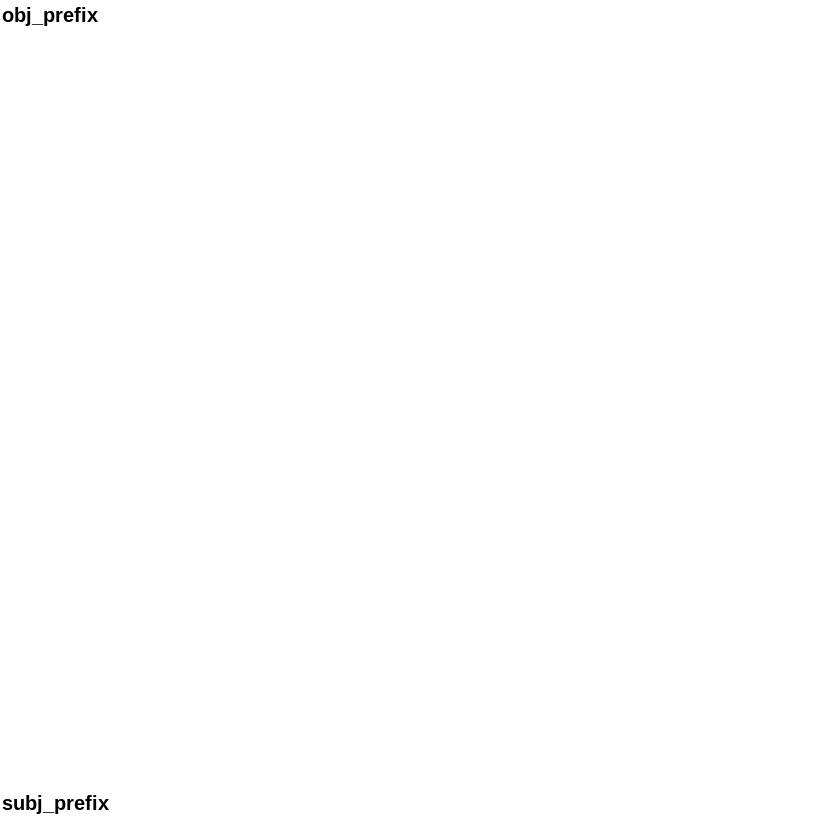

In [74]:
with(data_comp_px, parallelset(obj_prefix, subj_prefix,  freq=total))